In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
addidas = pd.read_excel("/Users/akosuke/Downloads/Adidas US Sales Datasets.xlsx")
addidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [3]:
addidas.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [4]:
addidas.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [5]:
addidas.shape

(9648, 13)

In [6]:
addidas.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

In [7]:
addidas["Sales Method"].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

In [8]:
addidas["Retailer"].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [9]:
addidas["Region"].unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

In [10]:
addidas["State"].unique()

array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Nebraska', 'Alabama', 'Maine', 'Alaska',
       'Hawaii', 'Wyoming', 'Virginia', 'Michigan', 'Missouri', 'Utah',
       'Oregon', 'Louisiana', 'Idaho', 'Arizona', 'New Mexico', 'Georgia',
       'South Carolina', 'North Carolina', 'Ohio', 'Kentucky',
       'Mississippi', 'Arkansas', 'Oklahoma', 'Kansas', 'South Dakota',
       'North Dakota', 'Iowa', 'Wisconsin', 'Indiana', 'West Virginia',
       'Maryland', 'Delaware', 'New Jersey', 'Connecticut',
       'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire'],
      dtype=object)

In [11]:
addidas["City"].unique()

array(['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago',
       'Dallas', 'Philadelphia', 'Las Vegas', 'Denver', 'Seattle',
       'Miami', 'Minneapolis', 'Billings', 'Knoxville', 'Omaha',
       'Birmingham', 'Portland', 'Anchorage', 'Honolulu', 'Orlando',
       'Albany', 'Cheyenne', 'Richmond', 'Detroit', 'St. Louis',
       'Salt Lake City', 'New Orleans', 'Boise', 'Phoenix', 'Albuquerque',
       'Atlanta', 'Charleston', 'Charlotte', 'Columbus', 'Louisville',
       'Jackson', 'Little Rock', 'Oklahoma City', 'Wichita',
       'Sioux Falls', 'Fargo', 'Des Moines', 'Milwaukee', 'Indianapolis',
       'Baltimore', 'Wilmington', 'Newark', 'Hartford', 'Providence',
       'Boston', 'Burlington', 'Manchester'], dtype=object)

In [12]:
addidas["Product"].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

In [13]:
print("start date:", min(addidas["Invoice Date"]), "end date:",max(addidas["Invoice Date"]))

start date: 2020-01-01 00:00:00 end date: 2021-12-31 00:00:00


In [14]:
addidas.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [15]:
addidas.groupby("State").describe()["Operating Margin"]

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
Alabama,216.0,0.553565,0.101975,0.30,0.4800,0.550,0.6300,0.80
Alaska,144.0,0.349861,0.080956,0.15,0.2500,0.350,0.4000,0.54
Arizona,216.0,0.389815,0.072253,0.25,0.3500,0.390,0.4425,0.55
Arkansas,216.0,0.440509,0.058645,0.35,0.4000,0.440,0.4900,0.55
California,432.0,0.386852,0.130900,0.10,0.3000,0.400,0.4800,0.69
Colorado,144.0,0.427083,0.141233,0.15,0.3250,0.415,0.5200,0.77
Connecticut,216.0,0.401620,0.070537,0.30,0.3500,0.400,0.4500,0.55
Delaware,144.0,0.427986,0.074200,0.30,0.3875,0.400,0.5000,0.55
Florida,360.0,0.390222,0.106009,0.20,0.3000,0.370,0.4500,0.65


In [16]:
bar_margin = addidas.groupby("State").mean()[["Operating Margin"]].reset_index()
bar_margin

,State,Operating Margin
0,Alabama,0.553565
1,Alaska,0.349861
2,Arizona,0.389815
3,Arkansas,0.440509
4,California,0.386852
5,Colorado,0.427083
6,Connecticut,0.401620
7,Delaware,0.427986
8,Florida,0.390222
9,Georgia,0.413704


In [17]:
bar_margin = bar_margin.sort_values(by = "Operating Margin", ascending = False)
bar_margin

,State,Operating Margin
0,Alabama,0.553565
41,Tennessee,0.506574
21,Michigan,0.475764
25,Montana,0.471042
32,North Carolina,0.463542
34,Ohio,0.459028
11,Idaho,0.458935
26,Nebraska,0.457917
47,West Virginia,0.456806
23,Mississippi,0.454306


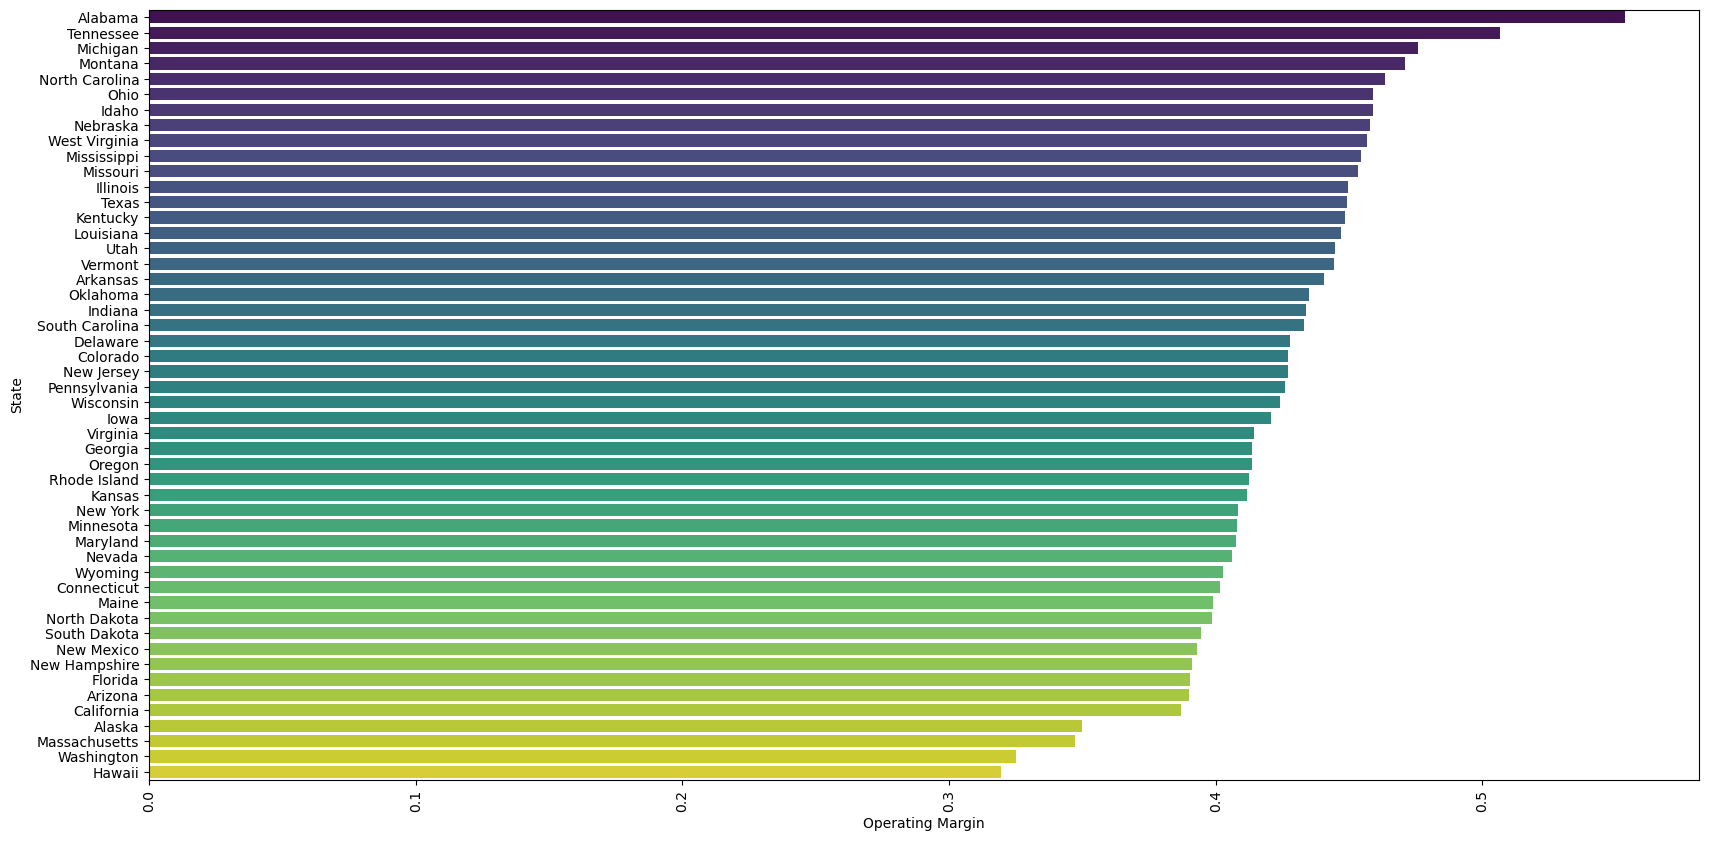

In [18]:
plt.figure(figsize = (20,10))
sns.barplot(x = "Operating Margin", y = "State", data = bar_margin, palette = "viridis")
plt.xticks(rotation = 90)
plt.show()

In [19]:
bar_sales = addidas.groupby("Product").mean()[["Total Sales"]].sort_values(by = "Total Sales", ascending = False).reset_index()
bar_sales

,Product,Total Sales
0,Men's Street Footwear,129705.741615
1,Women's Apparel,111342.574627
2,Men's Athletic Footwear,95449.490683
3,Women's Street Footwear,79603.739428
4,Men's Apparel,77041.489415
5,Women's Athletic Footwear,66395.950187


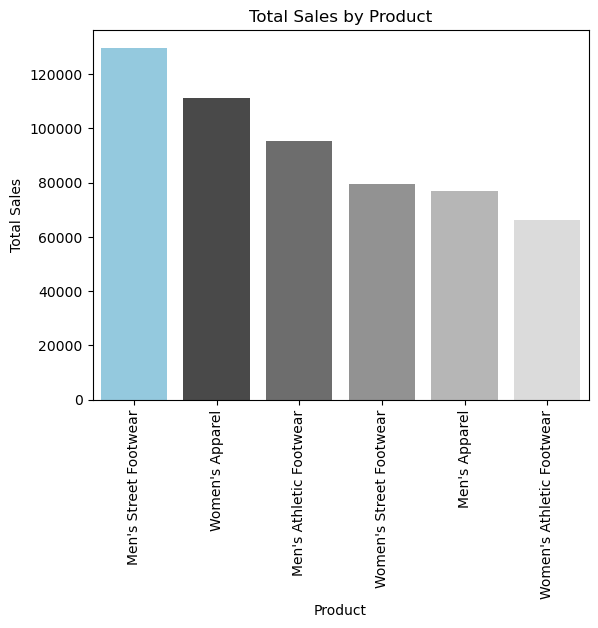

In [20]:
cmap = sns.color_palette("gray",len(bar_sales["Product"]))
cmap[0] = "skyblue"
sns.barplot(x = "Product", y = "Total Sales", data = bar_sales,palette = cmap)
plt.xticks(rotation = 90)
plt.title("Total Sales by Product")

plt.show()

In [21]:
by_region = addidas.groupby("Region").mean()[["Total Sales"]].sort_values(by = "Total Sales", ascending = False).reset_index()
by_region.head()

,Region,Total Sales
0,Southeast,133309.833333
1,West,110270.907680
2,South,83717.118634
3,Northeast,78419.220118
4,Midwest,72542.980235


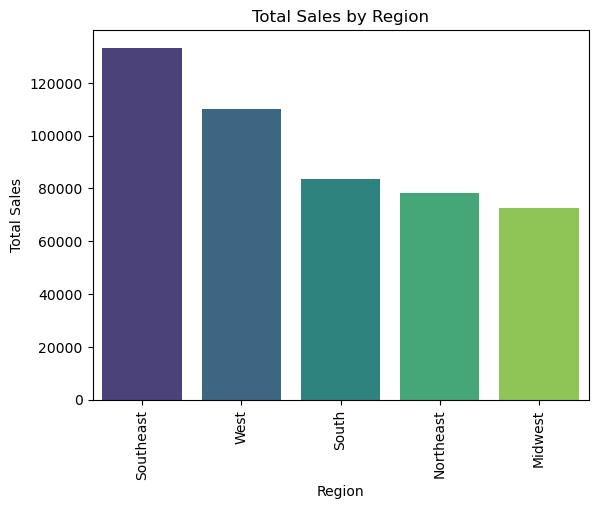

In [22]:
sns.barplot(x = "Region", y = "Total Sales", data = by_region, palette = "viridis")
plt.xticks(rotation = 90)
plt.title("Total Sales by Region")
plt.show()

In [23]:
by_retailer = addidas.groupby("Retailer").mean()[["Total Sales"]].sort_values(by = "Total Sales", ascending = False).reset_index()
by_retailer

,Retailer,Total Sales
0,Walmart,119102.891374
1,West Gear,102343.863943
2,Kohl's,99140.536893
3,Sports Direct,89798.718996
4,Foot Locker,83464.057641
5,Amazon,81874.512118


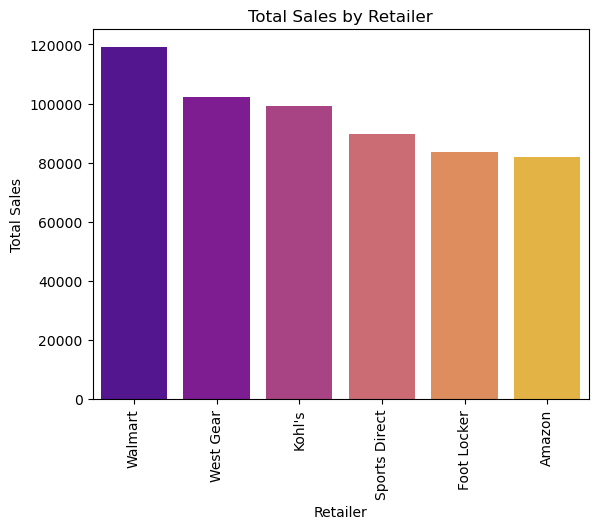

In [24]:
sns.barplot(x = "Retailer", y = "Total Sales", data = by_retailer,palette = "plasma")
plt.xticks(rotation = 90)
plt.title("Total Sales by Retailer")
plt.show()

In [25]:
by_sales_method = addidas.groupby("Sales Method").mean()[["Total Sales"]].sort_values(by = "Total Sales", ascending = False).reset_index()
by_sales_method

,Sales Method,Total Sales
0,In-store,204967.672414
1,Outlet,97908.411063
2,Online,50659.210882


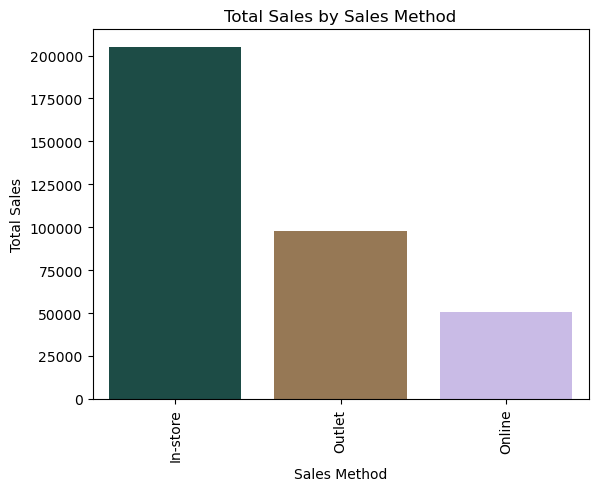

In [26]:
sns.barplot(x = "Sales Method", y = "Total Sales", data = by_sales_method,palette = "cubehelix")
plt.xticks(rotation = 90)
plt.title("Total Sales by Sales Method")
plt.show()

In [27]:
time_series = addidas.groupby("Invoice Date").mean()[["Total Sales"]].sort_values(by = "Invoice Date", ascending = True).reset_index()
time_series

,Invoice Date,Total Sales
0,2020-01-01,140856.833333
1,2020-01-02,114901.666667
2,2020-01-03,105428.833333
3,2020-01-04,102513.333333
4,2020-01-05,117971.500000
...,...,...
719,2021-12-27,120470.600000
720,2021-12-28,60202.000000
721,2021-12-29,42221.800000
722,2021-12-30,33580.600000


In [28]:
time_series["year_month"] = time_series["Invoice Date"].dt.strftime('%Y-%m')
time_series

,Invoice Date,Total Sales,year_month
0,2020-01-01,140856.833333,2020-01
1,2020-01-02,114901.666667,2020-01
2,2020-01-03,105428.833333,2020-01
3,2020-01-04,102513.333333,2020-01
4,2020-01-05,117971.500000,2020-01
...,...,...,...
719,2021-12-27,120470.600000,2021-12
720,2021-12-28,60202.000000,2021-12
721,2021-12-29,42221.800000,2021-12
722,2021-12-30,33580.600000,2021-12


In [29]:
year_month = time_series.groupby(["year_month"]).mean()[["Total Sales"]].reset_index()
year_month
year_month.to_csv("/Users/akosuke/Desktop/MSBAAtDominican/Marketing/addidas_data/year_month.csv")

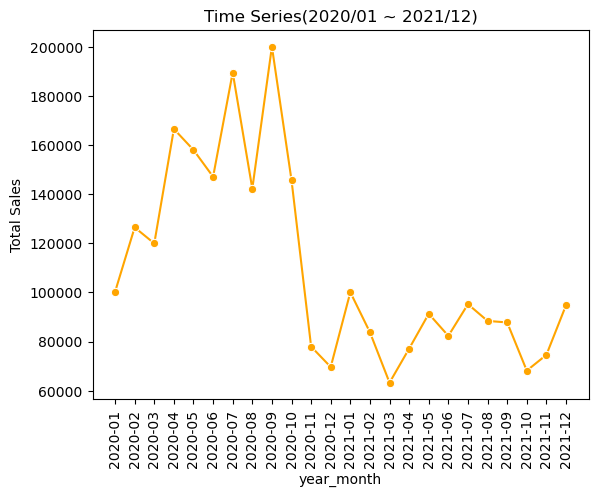

In [30]:
sns.lineplot(x = "year_month", y = "Total Sales", data = year_month, color = "orange", marker = "o")
plt.title("Time Series(2020/01 ~ 2021/12)")
plt.xticks(rotation = 90)
plt.show()

In [31]:
time_series["year"] = time_series["Invoice Date"].dt.year
time_series["month"] = time_series["Invoice Date"].dt.month
time_series

,Invoice Date,Total Sales,year_month,year,month
0,2020-01-01,140856.833333,2020-01,2020,1
1,2020-01-02,114901.666667,2020-01,2020,1
2,2020-01-03,105428.833333,2020-01,2020,1
3,2020-01-04,102513.333333,2020-01,2020,1
4,2020-01-05,117971.500000,2020-01,2020,1
...,...,...,...,...,...
719,2021-12-27,120470.600000,2021-12,2021,12
720,2021-12-28,60202.000000,2021-12,2021,12
721,2021-12-29,42221.800000,2021-12,2021,12
722,2021-12-30,33580.600000,2021-12,2021,12


In [32]:
year_2020 = time_series[time_series["year"] == 2020]
year_2020

,Invoice Date,Total Sales,year_month,year,month
0,2020-01-01,140856.833333,2020-01,2020,1
1,2020-01-02,114901.666667,2020-01,2020,1
2,2020-01-03,105428.833333,2020-01,2020,1
3,2020-01-04,102513.333333,2020-01,2020,1
4,2020-01-05,117971.500000,2020-01,2020,1
...,...,...,...,...,...
354,2020-12-27,133106.400000,2020-12,2020,12
355,2020-12-28,112846.800000,2020-12,2020,12
356,2020-12-29,115379.600000,2020-12,2020,12
357,2020-12-30,161687.000000,2020-12,2020,12


In [33]:
filename= "/Users/akosuke/Desktop/MSBAAtDominican/Marketing/addidas_data/"

In [34]:
year_2020 = year_2020.groupby("month").sum()[["Total Sales"]]
year_2020
year_2020.to_csv(filename+"year_2020.csv")

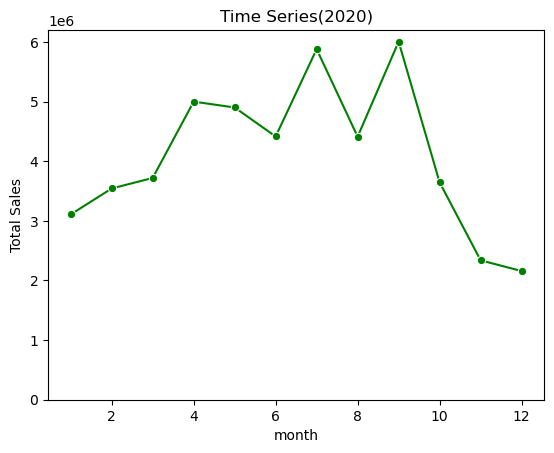

In [35]:
sns.lineplot(x = "month", y = "Total Sales", data = year_2020, color = "green", marker = "o")
plt.title("Time Series(2020)")
plt.ylim(0)
plt.show()

In [36]:
year_2021 = time_series[time_series["year"] == 2021]
year_2021

,Invoice Date,Total Sales,year_month,year,month
359,2021-01-01,130980.400000,2021-01,2021,1
360,2021-01-02,146122.800000,2021-01,2021,1
361,2021-01-03,60590.529412,2021-01,2021,1
362,2021-01-04,114414.800000,2021-01,2021,1
363,2021-01-05,78391.391304,2021-01,2021,1
...,...,...,...,...,...
719,2021-12-27,120470.600000,2021-12,2021,12
720,2021-12-28,60202.000000,2021-12,2021,12
721,2021-12-29,42221.800000,2021-12,2021,12
722,2021-12-30,33580.600000,2021-12,2021,12


In [37]:
year_2021 = year_2021.groupby("month").mean()[["Total Sales"]]
year_2021
year_2021.to_csv(filename + "yaer_2021.csv")

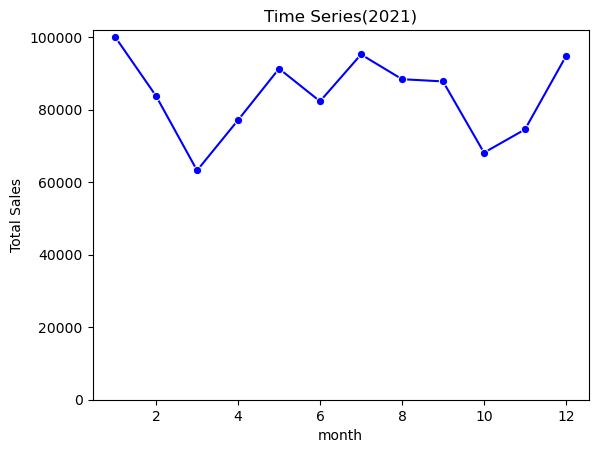

In [38]:
sns.lineplot(x = "month", y = "Total Sales", data = year_2021, color = "blue", marker = "o")
plt.title("Time Series(2021)")
plt.ylim(0)
plt.show()

In [39]:
addidas["Product"].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

In [40]:
def series_by_category(category,name,color,title):
    data = addidas[addidas[category] == name]
    data = data[["Product","Invoice Date","Total Sales"]]
    data["year_month"] = data["Invoice Date"].dt.strftime("%Y-%m")
    data = data.groupby("year_month").sum()[["Total Sales"]]
    data.to_csv(filename + title +"_sum.csv")
    

    sns.lineplot(x = "year_month", y = "Total Sales", data = data, color = color, marker = "o")
    plt.xticks(rotation = 90)
    plt.ylim(0)
    plt.title(title)
    plt.show()

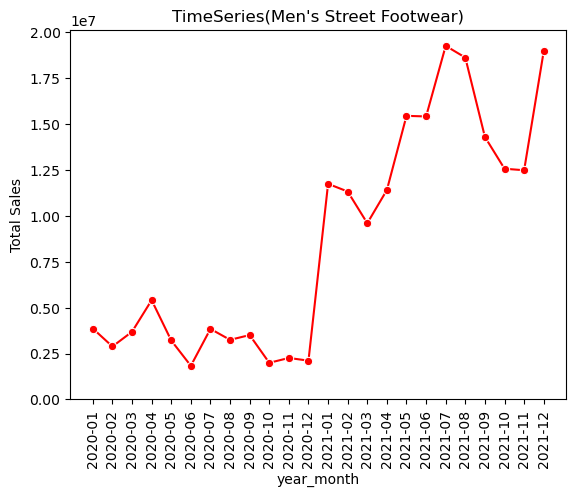

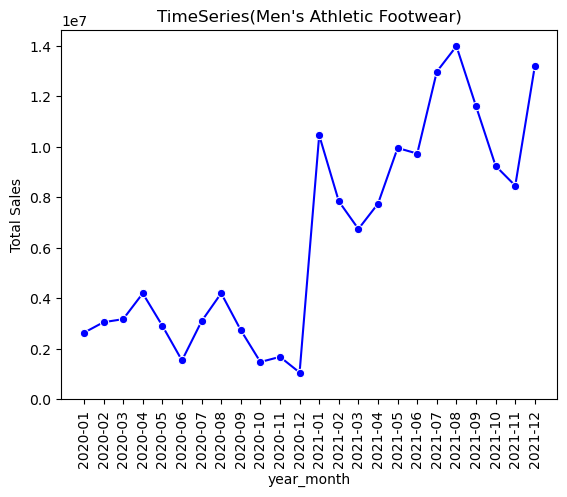

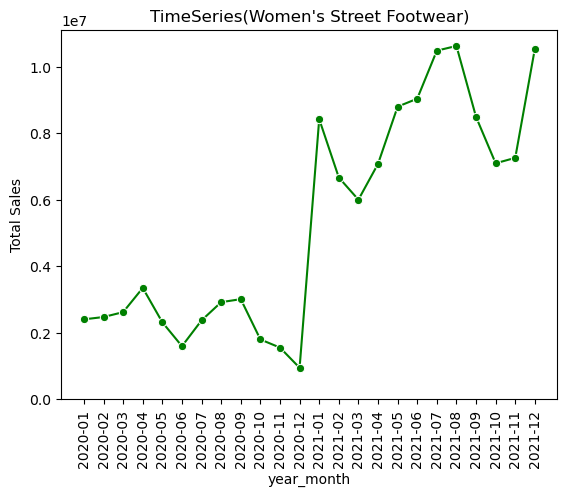

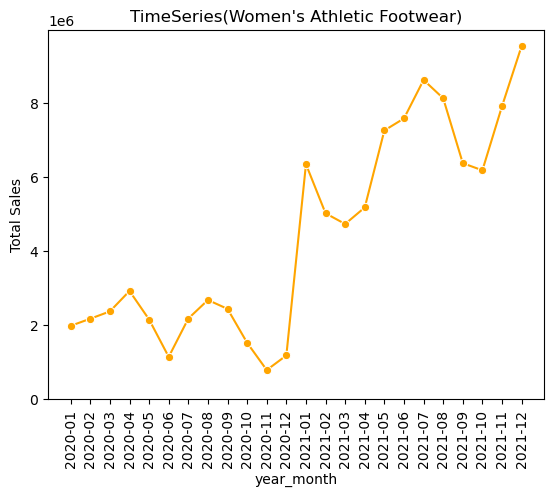

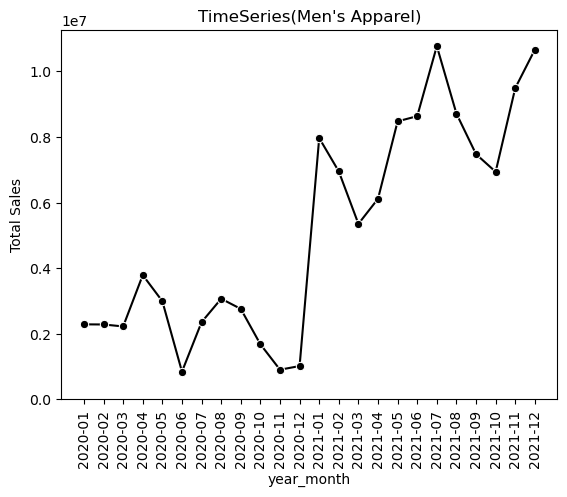

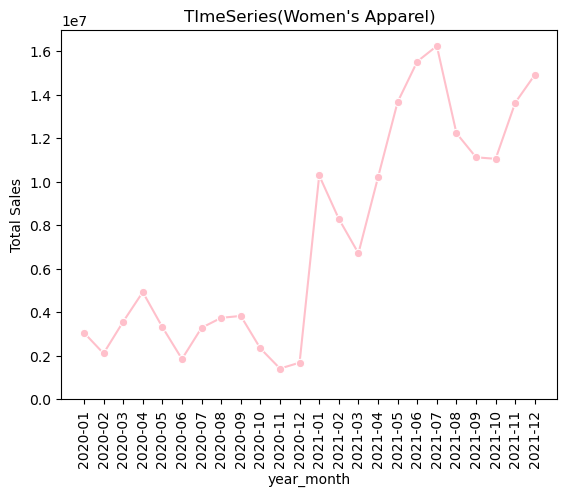

In [41]:
series_by_category("Product","Men's Street Footwear","red","TimeSeries(Men's Street Footwear)")
series_by_category("Product","Men's Athletic Footwear","blue","TimeSeries(Men's Athletic Footwear)")
series_by_category("Product","Women's Street Footwear","green","TimeSeries(Women's Street Footwear)")
series_by_category("Product","Women's Athletic Footwear","orange","TimeSeries(Women's Athletic Footwear)")
series_by_category("Product","Men's Apparel","black","TimeSeries(Men's Apparel)")
series_by_category("Product","Women's Apparel","pink","TImeSeries(Women's Apparel)")

In [42]:
addidas["Sales Method"].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

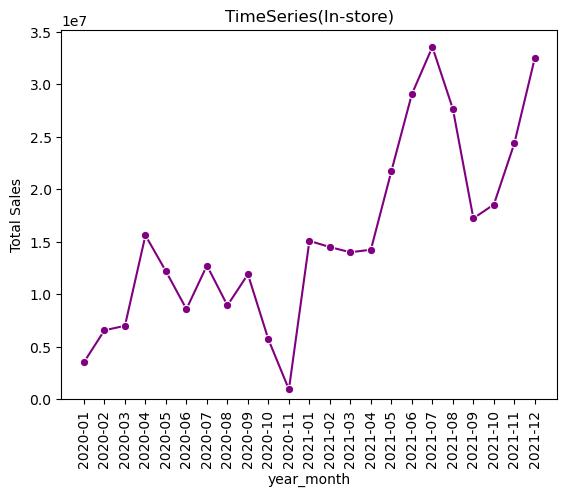

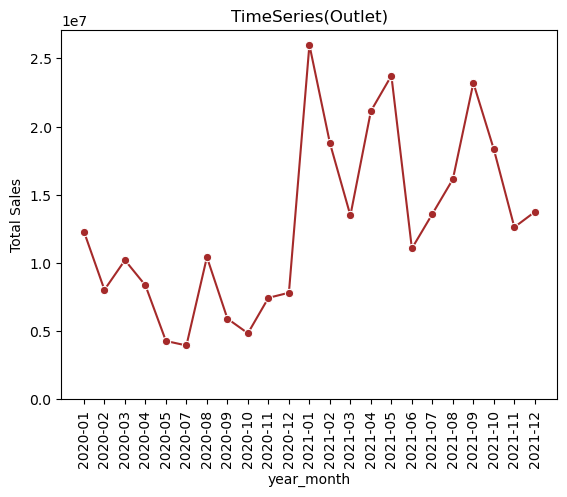

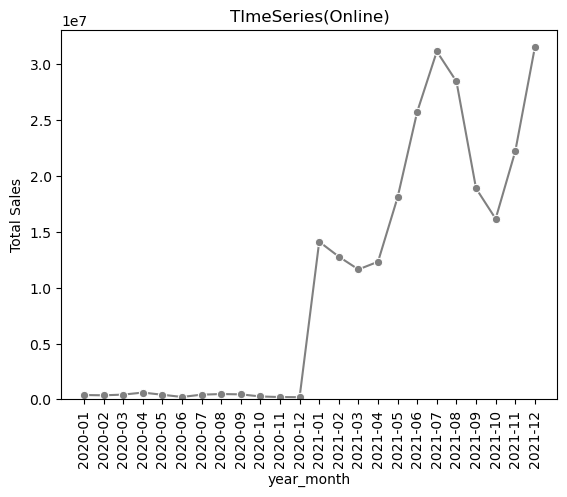

In [43]:
series_by_category("Sales Method","In-store","purple","TimeSeries(In-store)")
series_by_category("Sales Method","Outlet","brown","TimeSeries(Outlet)")
series_by_category("Sales Method","Online","gray","TImeSeries(Online)")

In [44]:
addidas_2020 = addidas
addidas_2020["year"] = addidas_2020["Invoice Date"].dt.year
addidas_2020 = addidas_2020[addidas_2020["year"] == 2020]
addidas_2020.groupby("Sales Method").mean()[["Total Sales"]]

,Total Sales
Sales Method,
In-store,327188.153310
Online,8528.237736
Outlet,172490.121649


In [45]:
addidas_2021= addidas
addidas_2021["year"] = addidas_2021["Invoice Date"].dt.year
addidas_2021 = addidas_2021[addidas_2021["year"] == 2021]
addidas_2021.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year
165,West Gear,1128299,2021-01-01,West,California,San Francisco,Men's Athletic Footwear,65.0,750,487500.0,121875.0,0.25,Outlet,2021
166,West Gear,1128299,2021-01-02,West,California,San Francisco,Women's Street Footwear,65.0,750,487500.0,195000.0,0.40,Outlet,2021
167,West Gear,1128299,2021-01-03,West,California,San Francisco,Women's Athletic Footwear,60.0,650,390000.0,136500.0,0.35,Outlet,2021
168,West Gear,1128299,2021-01-04,West,California,San Francisco,Men's Apparel,65.0,550,357500.0,196625.0,0.55,Outlet,2021
169,West Gear,1128299,2021-01-05,West,California,San Francisco,Women's Apparel,80.0,725,580000.0,116000.0,0.20,Outlet,2021


In [46]:
addidas_2021.groupby("Sales Method").mean()[["Total Sales"]]

,Total Sales
Sales Method,
In-store,180826.393668
Online,55781.811425
Outlet,83633.695343


In [47]:
addidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,2020
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,2020
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,2020
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,2020


In [48]:
pred_data = addidas[["Price per Unit","Units Sold","Operating Profit","Operating Margin","Sales Method","Total Sales"]]
pred_data.head()

,Price per Unit,Units Sold,Operating Profit,Operating Margin,Sales Method,Total Sales
0,50.0,1200,300000.0,0.50,In-store,600000.0
1,50.0,1000,150000.0,0.30,In-store,500000.0
2,40.0,1000,140000.0,0.35,In-store,400000.0
3,45.0,850,133875.0,0.35,In-store,382500.0
4,60.0,900,162000.0,0.30,In-store,540000.0


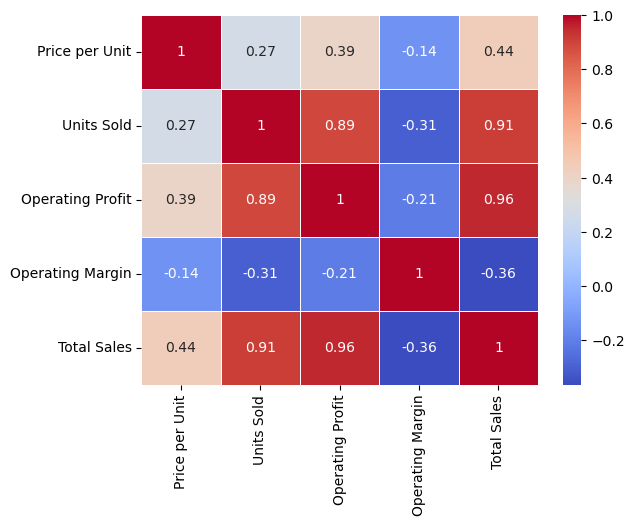

In [49]:
sns.heatmap(pred_data.corr(), cmap = "coolwarm", annot = True, linewidth = 0.5)
plt.show()

#### Operating Profit is after Total Sales. Remove this from variables to avoid mulitcollinearity. 

In [62]:
pred_data = pred_data[["Price per Unit", "Units Sold", "Operating Profit", "Operating Margin", "Total Sales"]]
pred_data.head()

,Price per Unit,Units Sold,Operating Profit,Operating Margin,Total Sales
0,50.0,1200,300000.0,0.50,600000.0
1,50.0,1000,150000.0,0.30,500000.0
2,40.0,1000,140000.0,0.35,400000.0
3,45.0,850,133875.0,0.35,382500.0
4,60.0,900,162000.0,0.30,540000.0


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [108]:
X = pred_data[["Price per Unit", "Units Sold", "Operating Margin"]]
y = pred_data["Total Sales"]

In [109]:
X

,Price per Unit,Units Sold,Operating Margin
0,50.0,1200,0.50
1,50.0,1000,0.30
2,40.0,1000,0.35
3,45.0,850,0.35
4,60.0,900,0.30
...,...,...,...
9643,50.0,64,0.28
9644,41.0,105,0.32
9645,41.0,184,0.37
9646,42.0,70,0.42


In [110]:
y

0       600000.0
1       500000.0
2       400000.0
3       382500.0
4       540000.0
          ...   
9643      3200.0
9644      4305.0
9645      7544.0
9646      2940.0
9647      2407.0
Name: Total Sales, Length: 9648, dtype: float64

In [111]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [112]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [113]:
model.coef_

array([   1949.03569956,     552.4532198 , -121381.36478181])

In [114]:
model.intercept_

-85717.13441173146

In [115]:
y_pred = model.predict(X_test)
y_pred

array([-30281.15329016, 117012.43676666, 166285.91008257, ...,
       328016.04353977,  93553.14734848, -70554.06554616])

Some predicted value is negative ... ?

In [116]:
X_test.tail()

,Price per Unit,Units Sold,Operating Margin
8080,20.0,179,0.39
4710,49.0,45,0.42
2420,45.0,700,0.50
2557,50.0,225,0.35
7278,32.0,31,0.53


In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f"MSE: {mean_squared_error(y_test,y_pred)}\nMAE: {mean_absolute_error(y_test,y_pred)}\nR^2_score: {r2_score(y_test,y_pred)}")

MSE: 2292700952.0487127
MAE: 36370.400635244194
R^2_score: 0.8878978495349775


In [50]:
dummies = pd.get_dummies(pred_data[["Sales Method"]])
dummies.head()

,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [51]:
pred_data = pd.concat([pred_data,dummies],axis = 1)
pred_data

,Price per Unit,Units Sold,Operating Profit,Operating Margin,Sales Method,Total Sales,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
0,50.0,1200,300000.00,0.50,In-store,600000.0,1,0,0
1,50.0,1000,150000.00,0.30,In-store,500000.0,1,0,0
2,40.0,1000,140000.00,0.35,In-store,400000.0,1,0,0
3,45.0,850,133875.00,0.35,In-store,382500.0,1,0,0
4,60.0,900,162000.00,0.30,In-store,540000.0,1,0,0
...,...,...,...,...,...,...,...,...,...
9643,50.0,64,896.00,0.28,Outlet,3200.0,0,0,1
9644,41.0,105,1377.60,0.32,Outlet,4305.0,0,0,1
9645,41.0,184,2791.28,0.37,Outlet,7544.0,0,0,1
9646,42.0,70,1234.80,0.42,Outlet,2940.0,0,0,1


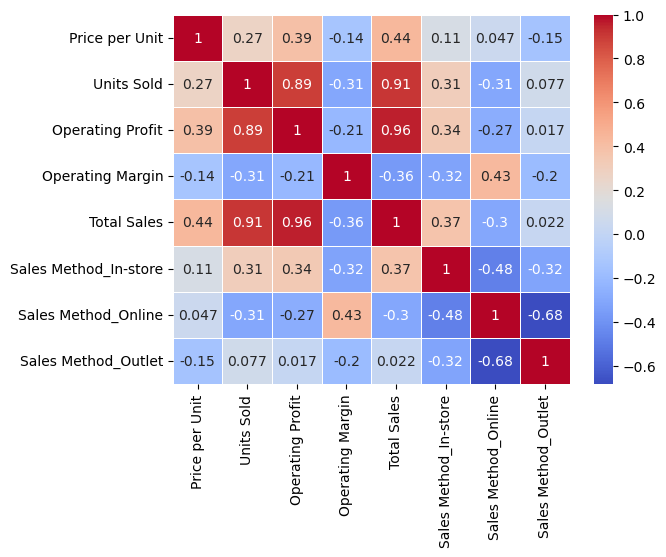

In [52]:
sns.heatmap(pred_data.corr(), cmap = "coolwarm", annot = True, linewidth = 0.5)
plt.show()

<AxesSubplot: >

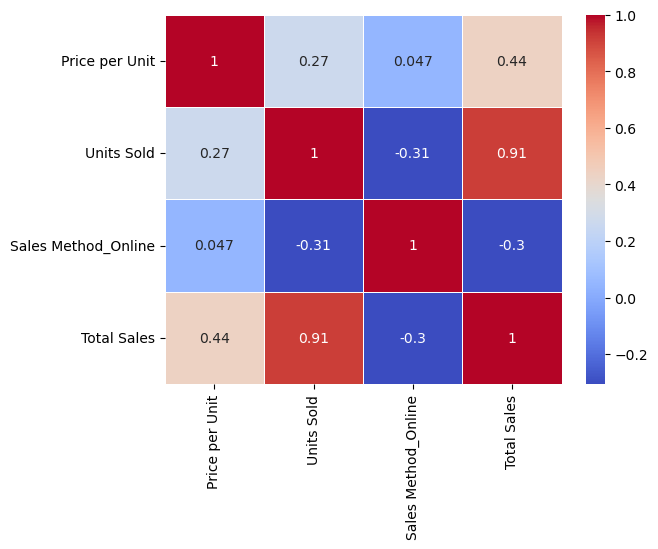

In [53]:
sns.heatmap(pred_data[["Price per Unit","Units Sold","Sales Method_Online","Total Sales"]].corr(),cmap = "coolwarm",annot = True, linewidth = 0.5)

In [54]:
category = addidas[["Retailer","Region","Product"]]
category.head()

,Retailer,Region,Product
0,Foot Locker,Northeast,Men's Street Footwear
1,Foot Locker,Northeast,Men's Athletic Footwear
2,Foot Locker,Northeast,Women's Street Footwear
3,Foot Locker,Northeast,Women's Athletic Footwear
4,Foot Locker,Northeast,Men's Apparel


In [55]:
category = pd.get_dummies(category)
category

,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,Retailer_Sports Direct,Retailer_Walmart,Retailer_West Gear,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
9644,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
9645,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
9646,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [56]:
pred_data = pd.concat([pred_data,category],axis = 1)
pred_data.head()

,Price per Unit,Units Sold,Operating Profit,Operating Margin,Sales Method,Total Sales,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Retailer_Amazon,...,Region_Northeast,Region_South,Region_Southeast,Region_West,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,50.0,1200,300000.0,0.50,In-store,600000.0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,50.0,1000,150000.0,0.30,In-store,500000.0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,40.0,1000,140000.0,0.35,In-store,400000.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,45.0,850,133875.0,0.35,In-store,382500.0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,60.0,900,162000.0,0.30,In-store,540000.0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


<AxesSubplot: >

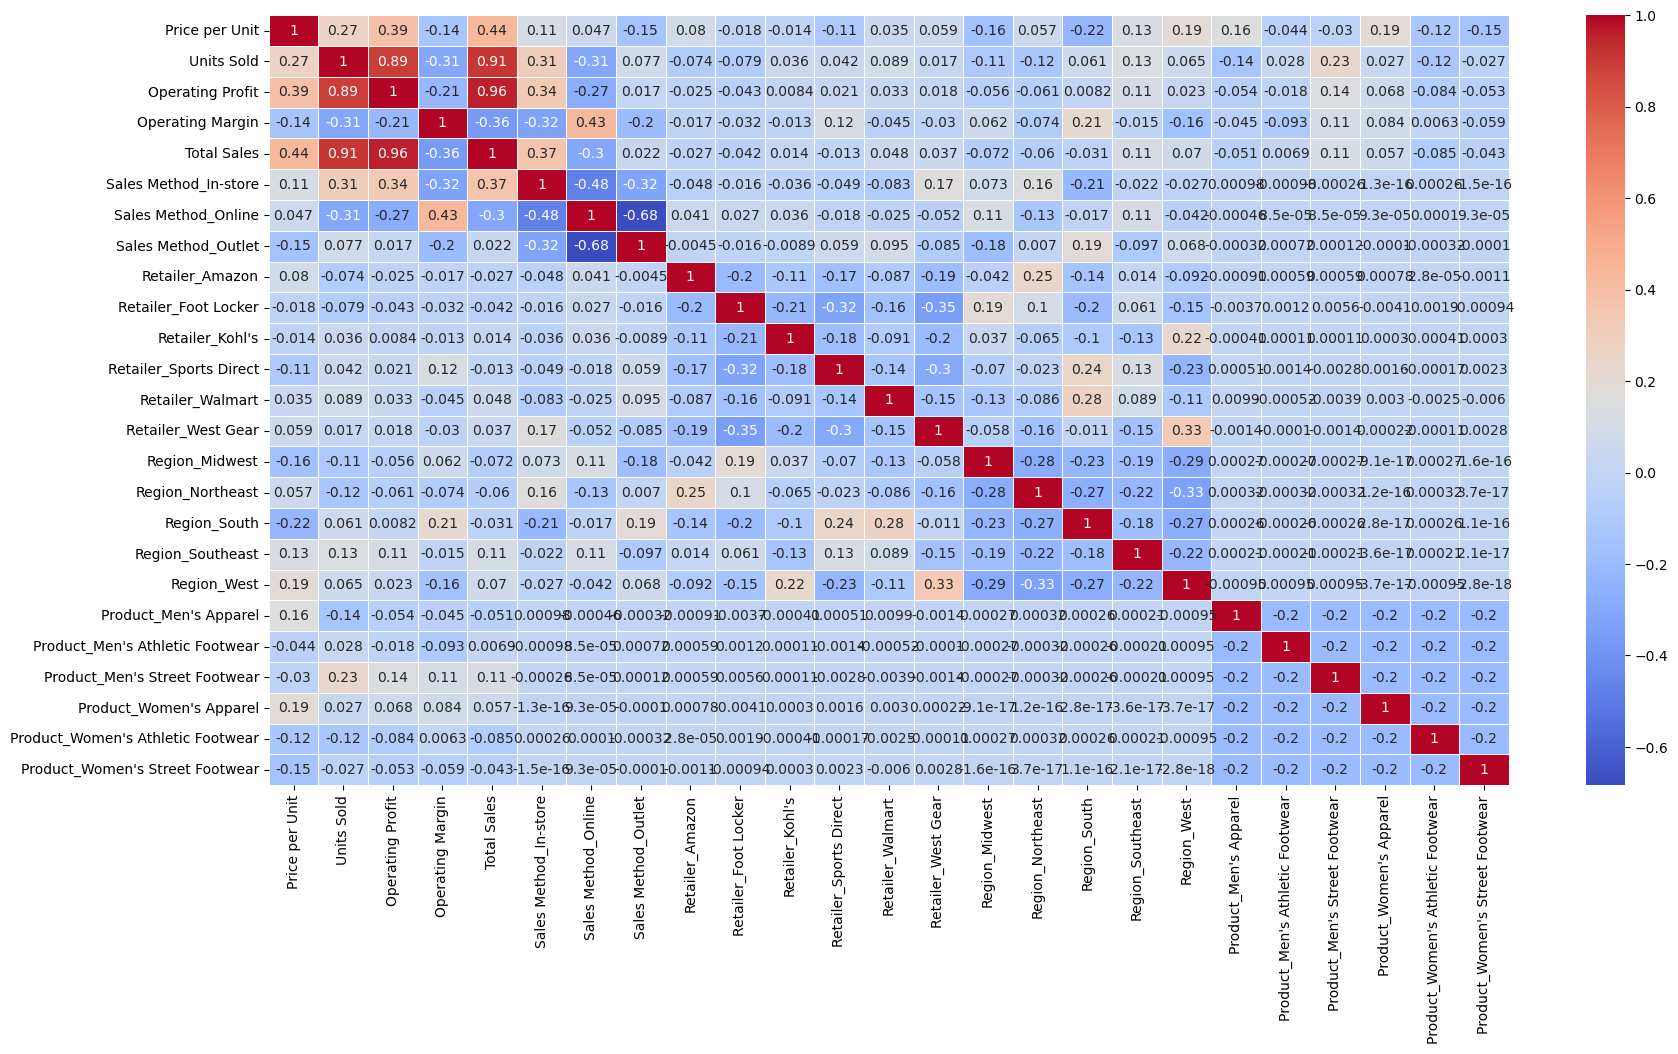

In [57]:
plt.figure(figsize = (20,10))
sns.heatmap(pred_data.corr(), annot = True, cmap = "coolwarm", linewidth = 0.5)

In [58]:
addidas[addidas["year"] == 2020].head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,2020
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,2020
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,2020
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,2020


In [59]:
addidas[addidas["year"] == 2021].head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year
165,West Gear,1128299,2021-01-01,West,California,San Francisco,Men's Athletic Footwear,65.0,750,487500.0,121875.0,0.25,Outlet,2021
166,West Gear,1128299,2021-01-02,West,California,San Francisco,Women's Street Footwear,65.0,750,487500.0,195000.0,0.40,Outlet,2021
167,West Gear,1128299,2021-01-03,West,California,San Francisco,Women's Athletic Footwear,60.0,650,390000.0,136500.0,0.35,Outlet,2021
168,West Gear,1128299,2021-01-04,West,California,San Francisco,Men's Apparel,65.0,550,357500.0,196625.0,0.55,Outlet,2021
169,West Gear,1128299,2021-01-05,West,California,San Francisco,Women's Apparel,80.0,725,580000.0,116000.0,0.20,Outlet,2021


In [60]:
addidas[addidas["year"]==2020].sort_values(by = "Product")

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year
4008,Walmart,1197831,2020-09-09,South,Texas,Houston,Men's Apparel,44.0,175,7700.0,3311.00,0.43,Online,2020
636,West Gear,1128299,2020-05-18,West,Colorado,Denver,Men's Apparel,75.0,375,281250.0,154687.50,0.55,In-store,2020
4596,West Gear,1128299,2020-07-29,West,Washington,Seattle,Men's Apparel,85.0,115,9775.0,3910.00,0.40,Online,2020
630,West Gear,1128299,2020-05-12,West,Colorado,Denver,Men's Apparel,65.0,300,195000.0,107250.00,0.55,In-store,2020
4602,West Gear,1128299,2020-08-04,West,Washington,Seattle,Men's Apparel,82.0,133,10906.0,4144.28,0.38,Online,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,Sports Direct,1197831,2020-08-08,South,Texas,Houston,Women's Street Footwear,24.0,232,5568.0,2060.16,0.37,Outlet,2020
4438,West Gear,1128299,2020-02-21,West,Nevada,Las Vegas,Women's Street Footwear,57.0,117,6669.0,3334.50,0.50,Online,2020
754,West Gear,1185732,2020-09-13,Southeast,Florida,Miami,Women's Street Footwear,55.0,825,453750.0,113437.50,0.25,In-store,2020
4432,West Gear,1128299,2020-02-15,West,Nevada,Las Vegas,Women's Street Footwear,60.0,152,9120.0,4742.40,0.52,Online,2020
